In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Plotting

In [2]:
# Load in the data set
tips_data = sns.load_dataset("tips")

## Plot a histogram of the tips

/tmp/ipykernel_27356/3778091615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_data["tip"], kde = False, bins=10).set_title("Histogram of Total Tip")


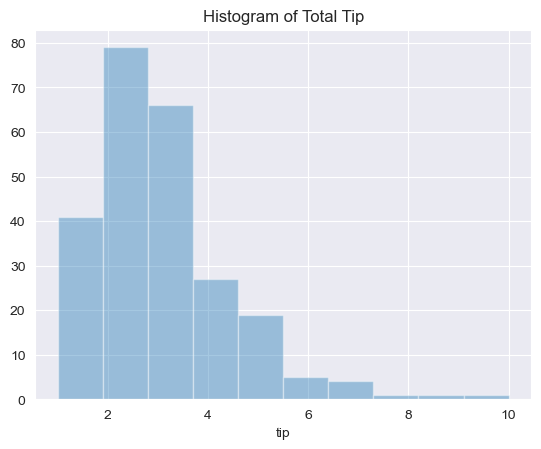

In [9]:
# with seaborn
sns.distplot(tips_data["tip"], kde = False, bins=10).set_title("Histogram of Total Tip")
plt.show()

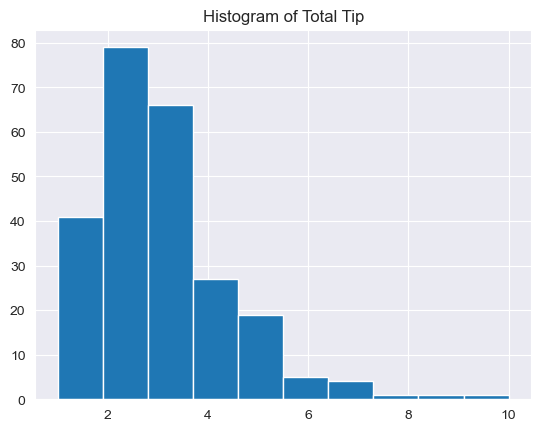

In [11]:
# with matplotlib
plt.hist(tips_data['tip'], bins=10)
plt.title("Histogram of Total Tip")
plt.show()

## Create a boxplot of the total bill amounts

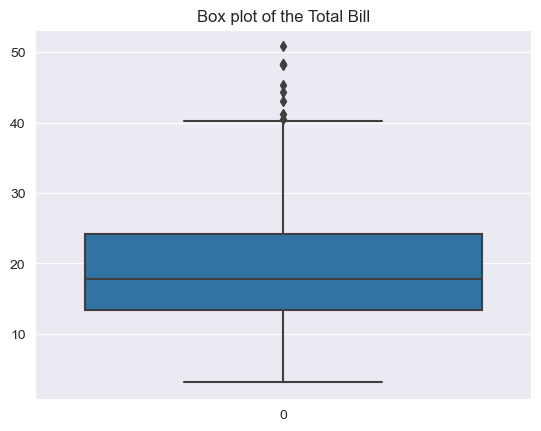

In [12]:
# with seaborn
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

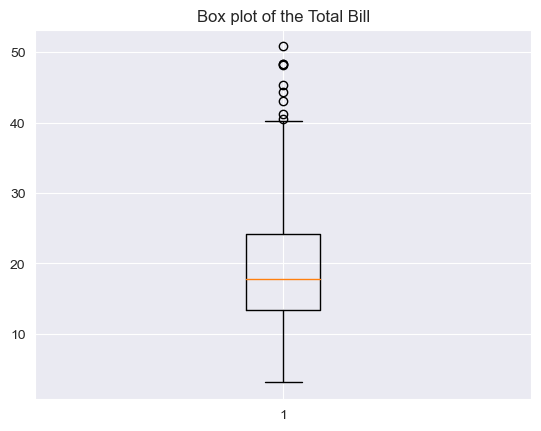

In [13]:
# with matplotlib
plt.boxplot(tips_data["total_bill"])
plt.title("Box plot of the Total Bill")
plt.show()

# Pandas Data Frame Manipulation

In [14]:
# Import NHANES 2015-2016 data
df = pd.read_csv("nhanes_2015_2016.csv")

In [15]:
# look at top 3 rows
df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


### Pick columns by name

In [16]:
df['SEQN'].head()

0    83732
1    83733
2    83734
3    83735
4    83736
Name: SEQN, dtype: int64

### Pick columns and rows by index name

In [17]:
df.loc[[0, 1], ['SEQN', 'RIAGENDR']]

,SEQN,RIAGENDR
0,83732,1
1,83733,1


### Pick columns and rows by index location

In [18]:
df.iloc[[1,2], [0,5]]

,SEQN,RIAGENDR
1,83733,1
2,83734,1


# Unit testing
This is the idea that you should run complicated code on a simple test case that you know that outcome of. If your code outputs something you did not expect, then you know there is an error somewhere that must be fixed. When working with large datasets, it is easy to get reasonable output that is actually measuring something different than you wanted. 

In [19]:
df = pd.DataFrame({'col1':[1, 2, 3], 'col2':[3, 4, 5]})
df

,col1,col2
0,1,3
1,2,4
2,3,5


In [23]:
# mean of the first row
display(df.mean())
df.mean()[0]

col1    2.0
col2    4.0
dtype: float64

2.0

Looks like this is actually returning the mean of the first column. Doing a simple test, we found an error that would have been much harder to spot had our DataFrame been 100,000 rows and 300 columns. 

In [24]:
# Use the argument 'axis=1' to return the means of each row in the dataframe
# Use 'axis=0' (which is the default) to return the means of each column in the dataframe
# The Pandas .mean() method returns a series which can be accessed by a bracketed index value
print(df.mean(axis=1))
print("\n")
print(type(df.mean(axis=1)))
print("\n")
print(df.mean(axis=0))
print("\n")
print(df.mean(axis=1)[2])
print("\n")
print(df.mean(axis=0)[1])

0    2.0
1    3.0
2    4.0
dtype: float64


<class 'pandas.core.series.Series'>


col1    2.0
col2    4.0
dtype: float64


4.0


4.0


## Randomness and reproducibility

In Python, we refer to randomness as the ability to generate data, strings, or, more generally, numbers at random.

However, when conducting analysis it is important to consider reproducibility. If we are creating random data, how can we enable reproducible analysis?

We do this by utilizing pseudo-random number generators (PRNGs). PRNGs start with a random number, known as the seed, and then use an algorithm to generate a psuedo-random sequence based on it.

This means that we can replicate the output of a random number generator in python simply by knowing which seed was used.

We can showcase this by using the functions in the python library random.

In [25]:
import random

In [26]:
random.seed(1234)
random.random()

0.9664535356921388

In [27]:
random.seed(1234)
random.random()

0.9664535356921388

The random library includes standard distributions that may come in handy

In [28]:
# Uniform distribution
random.uniform(25,50)

36.01831497938382

In [29]:
mu = 0
sigma = 1
random.normalvariate(mu, sigma)

1.8038006216944658

# List comprehension
List comprehensions allow you to easy create lists. They follow the format:
```
my_list = [expression(i) for i in input list]
```
For example, if you wanted to plot the sin curve from -$\pi$ to $\pi$:

In [32]:
# create a list of 100 equally spaced points between -pi and pi
x = np.linspace(-np.pi, np.pi, 100)
x.shape

(100,)

In [33]:
# Here's our list comprehension. For each point in x, we want y=sin(x)
y = [np.sin(value) for value in x] 
# let looks at just the first 5 elements of y
y[:5]

[-1.2246467991473532e-16,
 -0.06342391965656484,
 -0.12659245357374935,
 -0.18925124436041052,
 -0.2511479871810793]

In [34]:
# It doesn't really matter what word you use to represent a value in the input list, 
# the following will built the same y
y = [np.sin(i) for i in x]
y[:5]

[-1.2246467991473532e-16,
 -0.06342391965656484,
 -0.12659245357374935,
 -0.18925124436041052,
 -0.2511479871810793]

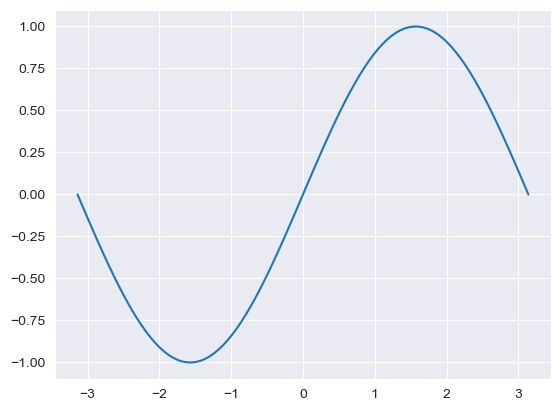

In [35]:
plt.plot(x,y)
plt.show()